Walmart : predict weekly sales
Company's Description 📇
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

Project 🚧
Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

Goals 🎯
The project can be divided into three steps:

Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
Part 2 : train a linear regression model (baseline)
Part 3 : avoid overfitting by training a regularized regression model
Scope of this project 🖼️
For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using our custom dataset (available on JULIE). 🤓

Deliverable 📬
To complete this project, your team should:

Create some visualizations
Train at least one linear regression model on the dataset, that predicts the amount of weekly sales as a function of the other variables
Assess the performances of the model by using a metric that is relevant for regression problems
Interpret the coefficients of the model to identify what features are important for the prediction
Train at least one model with regularization (Lasso or Ridge) to reduce overfitting

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [16]:
# Chargement du dataset
Walmart = pd.read_csv('../data/Walmart_Store_sales.csv')

print("Shape du dataset :", Walmart.shape)
display(Walmart.head())
display(Walmart.info())
display(Walmart.describe())

Shape du dataset : (150, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


Number of rows: 150
Number of columns: 8
Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Missing values per column:


Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

Percentage of missing values:


Store            0.00
Date            12.00
Weekly_Sales     9.33
Holiday_Flag     8.00
Temperature     12.00
Fuel_Price       9.33
CPI              8.00
Unemployment    10.00
dtype: float64

Number of duplicated rows: 0


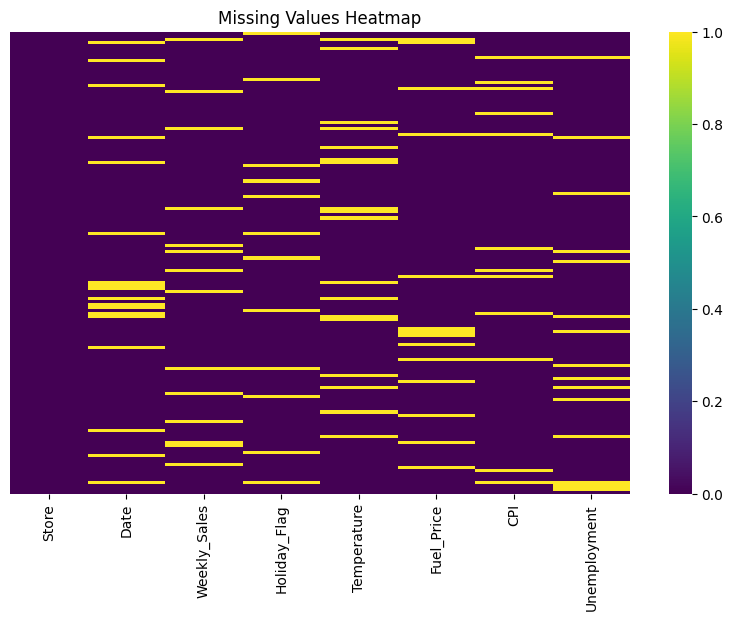

In [17]:
# Statistiques basiques sur le dataset original
print(f"Number of rows: {Walmart.shape[0]}")
print(f"Number of columns: {Walmart.shape[1]}")
print(f"Columns: {list(Walmart.columns)}")

print("\nBasics statistics: ")
display(Walmart.describe(include="all"))

# Valeurs manquées
print("Missing values per column:")
display(Walmart.isnull().sum())

print("Percentage of missing values:")
display((Walmart.isnull().sum() / len(Walmart) * 100).round(2))


print(f"Number of duplicated rows: {Walmart.duplicated().sum()}")

# Missing values visualization
plt.figure(figsize=(10, 6))
sns.heatmap(Walmart.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
"""
=== ANALYSE DES RÉSULTATS OBTENUS ===

D'après notre exploration, nous avons identifié :

PROBLÈMES DÉTECTÉS :
- 150 lignes, 8 colonnes
- Weekly_Sales (notre cible) : 14 valeurs manquantes (9.33%)
- Date : 18 valeurs manquantes (12%)
- Temperature : 18 valeurs manquantes (12%)
- Fuel_Price : 14 valeurs manquantes (9.33%)
- Holiday_Flag : 12 valeurs manquantes (8%)
- CPI : 12 valeurs manquantes (8%)
- Unemployment : 15 valeurs manquantes (10%)
- Aucune ligne dupliquée

ACTIONS À ENTREPRENDRE :

1. SUPPRESSION DES VALEURS MANQUANTES DE LA CIBLE
   - Supprimer les 14 lignes où Weekly_Sales est NaN
   - Règle Jedha : Jamais d'imputation sur la variable cible

2. FEATURE ENGINEERING SUR DATE
   - Créer Year, Month, Day, DayOfWeek depuis Date
   - Date ne peut pas être utilisée directement dans sklearn

3. GESTION DES AUTRES VALEURS MANQUANTES
   - À traiter avec sklearn dans le pipeline

4. DÉTECTION OUTLIERS (règle 3σ)
   - Temperature, Fuel_Price, CPI, Unemployment
"""

print("Analyse terminée. Début du nettoyage...")

Analyse terminée. Début du nettoyage...


In [19]:
# Conversion de la colonne Date en datetime
Walmart['Date'] = pd.to_datetime(Walmart["Date"], format="%d-%m-%Y")
print("Date minimale : ", Walmart['Date'].min())
print("Date maximale : ", Walmart['Date'].max())

Date minimale :  2010-02-05 00:00:00
Date maximale :  2012-10-19 00:00:00


### POURQUOI ANALYSER LA DISTRIBUTION DES DATES ?
1. Détecter les biais temporels :

Y a-t-il des dates sur-représentées ?
Y a-t-il des périodes manquantes ?

2. Choisir la méthode d'imputation :

Si distribution uniforme → KNN approprié
Si certaines dates dominent → autres stratégies

3. Comprendre les données business :

Données hebdomadaires ? mensuelles ?
Saisonnalité ?

In [20]:
# Regarder les dates qui posent problème
print("Lignes avec des dates non convertibles :")
mask_date_invalid = pd.to_datetime(Walmart["Date"], format="%d-%m-%Y", errors='coerce').isna()
display(Walmart.loc[mask_date_invalid, ['Date', 'Weekly_Sales']])

Lignes avec des dates non convertibles :


,Date,Weekly_Sales
3,NaT,1244390.03
9,NaT,418925.47
17,NaT,1205307.50
34,NaT,1853161.99
42,NaT,1661767.33
65,NaT,1714309.90
81,NaT,359206.21
82,NaT,1569607.94
83,NaT,607475.44
86,NaT,986922.62


In [21]:
# Analyse de la répartition des dates
dict_datesuniques = {}
list_uniques = Walmart['Date'].unique()
list_uniques = list_uniques[~pd.isnull(list_uniques)]  # remove NaN

for unique in list_uniques:
    mask = Walmart['Date'] == unique
    dict_datesuniques[unique] = len(Walmart.loc[mask, :])

fig = px.histogram(x=list(dict_datesuniques.keys()), y=list(dict_datesuniques.values()), 
                   title="Number of repetitions for all unique dates")
fig.show()

px.bar(x=Walmart['Date'], title="Count of each unique date")

# conclusion : Distribution équilibrée → KNN approprié pour l'imputation.

## Preprocessing

In [22]:
# Suppression des lignes sans target

Walmart.dropna(subset=["Weekly_Sales"], inplace=True)

Walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [23]:
# Définition des limites outliers 
data_describe = Walmart.describe(include="all")  #  Crée un DataFrame avec toutes les stats (mean, std, min, max, etc.)
col_X_quanti = ["Temperature", "Fuel_Price", "CPI", "Unemployment"] # Liste des 4 variables numériques où détecter les outliers

data_dict = {
    'mean': data_describe.loc["mean", col_X_quanti],
    'std': data_describe.loc["std", col_X_quanti] 
} #.loc["mean", col_X_quanti] = récupère les moyennes des 4 colonnes → .loc["std", col_X_quanti] = récupère les écarts-types des 4 colonnes

df_stat = pd.DataFrame(data_dict)  # Transforme le dictionnaire en DataFrame avec colonnes 'mean' et 'std'
df_stat['outliers_min'] = (df_stat['mean'] - 3*df_stat['std'])
df_stat['outliers_max'] = (df_stat['mean'] + 3*df_stat['std']) # Règle 3σ : tout ce qui est en dehors de [μ-3σ, μ+3σ] = outlier

display(df_stat)

,mean,std,outliers_min,outliers_max
Temperature,60.853967,18.514432,5.310671,116.397263
Fuel_Price,3.316992,0.47954,1.878371,4.755613
CPI,178.091144,40.243105,57.36183,298.820458
Unemployment,7.665582,1.619428,2.807297,12.523867


In [24]:
# Visualisation des distributions 
fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    go.Histogram(x=Walmart['Temperature'], name='Temperature'),
    row=1, col=1)

fig.add_trace(
    go.Histogram(x=Walmart['Fuel_Price'], name='Fuel_Price'),
    row=2, col=1)

fig.add_trace(
    go.Histogram(x=Walmart['CPI'], name='CPI'),
    row=3, col=1)

fig.add_trace(
    go.Histogram(x=Walmart['Unemployment'], name='Unemployment'),
    row=4, col=1)

fig.update_layout(width=700, height=1000)
fig.show()

In [25]:
# Vérification des outliers Unemployment
display(Walmart.loc[Walmart['Unemployment'] > 12,:])
display(Walmart.loc[Walmart['Store'] == 12,:])

# Conclusion : on ne peut pas retirer ces 5 outliers, sinon on retire le Store numéro 12 du dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
30,12.0,2011-05-06,1021154.48,0.0,68.40,4.193,129.044433,13.736
62,12.0,2010-12-17,1295605.35,0.0,52.77,3.236,126.879484,14.313
68,12.0,2011-08-12,955913.68,0.0,91.04,3.701,129.201581,13.503
93,12.0,2011-05-27,964332.51,0.0,NaN,4.087,129.062355,13.736
135,12.0,2010-09-10,903119.03,1.0,83.63,3.044,126.114581,14.180


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
30,12.0,2011-05-06,1021154.48,0.0,68.40,4.193,129.044433,13.736
62,12.0,2010-12-17,1295605.35,0.0,52.77,3.236,126.879484,14.313
68,12.0,2011-08-12,955913.68,0.0,91.04,3.701,129.201581,13.503
93,12.0,2011-05-27,964332.51,0.0,NaN,4.087,129.062355,13.736
135,12.0,2010-09-10,903119.03,1.0,83.63,3.044,126.114581,14.180


In [26]:
# Extraction des composants temporels de la Date
Walmart_processed = Walmart.copy(deep=True)
Walmart_processed['Year'] = Walmart_processed['Date'].dt.year
Walmart_processed['Month'] = Walmart_processed['Date'].dt.month
Walmart_processed['Day'] = Walmart_processed['Date'].dt.day
Walmart_processed['weekday'] = Walmart_processed['Date'].dt.dayofweek

# Suppression de la colonne Date originale
Walmart_processed.drop('Date', axis=1, inplace=True)

print(Walmart_processed['weekday'].value_counts()) 
# weekday constante (vendredi uniquement) donc non informative pour le modèle
Walmart_processed = Walmart_processed.drop("weekday", axis=1)

display(Walmart_processed.head())


weekday
4.0    118
Name: count, dtype: int64


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0


In [27]:
# EDA après preprocessing
print("Pourcentage de valeurs manquantes après preprocessing :")
display(100 * Walmart_processed.isnull().sum() / Walmart_processed.shape[0])

# Matrice de corrélation
corr_matrix = Walmart_processed.corr().round(2)
px.imshow(corr_matrix, text_auto=True, title="Matrice de corrélation").show()

# Distribution des nouvelles variables temporelles
px.histogram(Walmart_processed, x="Month", title="Distribution par mois").show()
px.histogram(Walmart_processed, x="Year", title="Distribution par année").show()

Pourcentage de valeurs manquantes après preprocessing :


Store            0.000000
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
Year            13.235294
Month           13.235294
Day             13.235294
dtype: float64

**Conclusions :**
- Aucune feature ne présente une corrélation linéaire forte avec la target
- Les variables qui semblent le plus liées à Weekly_Sales sont : Store, CPI, Temperature
- Valeurs manquantes présentes (8-13%) → traitement par pipeline sklearn avec imputation

## Creation of X and Y datasets

In [28]:
# Séparation de X/y
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = Walmart_processed.drop(target_variable, axis=1)
y = Walmart_processed.loc[:, target_variable]

print("...Done.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

     Year  Month   Day  
0  2011.0    2.0  18.0  
1  2011.0    3.0  25.0  
3     NaN    NaN   NaN  
4  2010.0    5.0  28.0  
5  2010.0    5.0  28.0  


In [43]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("...Done.")
print()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Dividing into train and test sets...
...Done.

X_train shape: (108, 9)
X_test shape: (28, 9)
y_train shape: (108,)
y_test shape: (28,)


In [44]:
# Définition des colonnes numériques et catégorielles
display(X.dtypes)
numeric_features = list(X.columns)
numeric_features.remove('Store')
numeric_features.remove('Holiday_Flag')
categorical_features = ["Store", "Holiday_Flag"]
print("numeric features:", numeric_features)
print("categorical features:", categorical_features)

Store           float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year            float64
Month           float64
Day             float64
dtype: object

numeric features: ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']
categorical features: ['Store', 'Holiday_Flag']


In [45]:
# Pipelines pour imputer les valeurs manquantes, standardiser les variables quantitatives et encoder les catégorielles
numeric_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer(n_neighbors=5)), 
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

print("Preprocessor créé !")

Preprocessor créé !


In [46]:
# Transformation de X_train et X_test
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(X_train[0:5])  
print()

# Preprocessing sur le test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)  
print("...Done.")
print(X_test[0:5, :])

Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
118    9.0           NaN        82.99       2.637  215.016648         6.384   
11    18.0           0.0        52.02       2.878  132.763355         9.331   
3     11.0           0.0        84.57         NaN  214.556497         7.346   
54    10.0           0.0        86.87       3.666  130.719633         7.170   
108   18.0           0.0        69.12       2.906  132.293936           NaN   

       Year  Month   Day  
118  2010.0    6.0  18.0  
11   2010.0   10.0  15.0  
3       NaN    NaN   NaN  
54   2012.0    7.0   6.0  
108  2010.0    5.0  28.0  
...Done.
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (5, 29)>
  Coords	Values
  (0, 0)	1.2290638277821369
  (0, 1)	-1.4582304954209118
  (0, 2)	0.9667514709413113
  (0, 3)	-0.7618476721532947
  (0, 4)	-1.0760954651753933
  (0, 5)	-0.10134522606176094
  (0, 6)	0.211004326397

## Entraînement modèle baseline / LinearRegression

In [53]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Résultats
print("RÉSULTATS MODÈLE BASELINE")
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

RÉSULTATS MODÈLE BASELINE
R2 score on training set :  0.972164718176716
R2 score on test set :  0.9313740898267597


In [54]:
# Validation croisée sur le train set
scores = cross_val_score(model, X_train, y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('=== VALIDATION CROISÉE ===')
print('Cross-validated accuracy : {:.4f}'.format(avg))
print('Standard deviation : {:.4f}'.format(std))

=== VALIDATION CROISÉE ===
Cross-validated accuracy : 0.9348
Standard deviation : 0.0321


In [58]:
# Analyse des coefficients et feature importance
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list 
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

coefs = pd.DataFrame(index=column_names, data=model.coef_.transpose(), columns=["coefficients"])
feature_importance = abs(coefs).sort_values(by='coefficients', ascending=False)

print("FEATURE IMPORTANCE")
display(feature_importance.head(10))

FEATURE IMPORTANCE


,coefficients
x0_5.0,1.292470e+06
x0_3.0,1.163547e+06
x0_16.0,1.090801e+06
x0_9.0,1.051283e+06
x0_7.0,1.021962e+06
x0_15.0,7.320361e+05
x0_8.0,7.187265e+05
x0_4.0,6.611829e+05
x0_17.0,6.595555e+05
x0_14.0,5.712108e+05


In [60]:
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}# to avoid cropping of column names
                 )
fig.show()

## MODÈLES RÉGULARISÉS / Regularized regression model

In [61]:
# 1. Ridge simple d'abord
ridge = Ridge()
ridge.fit(X_train, y_train)
print("R² Ridge train:", ridge.score(X_train, y_train))
print("R² Ridge test:", ridge.score(X_test, y_test))

R² Ridge train: 0.9369454493499328
R² Ridge test: 0.9091407985880829


In [70]:
# 2. GridSearchCV Ridge - valeurs exactes exercice Jedha
params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
gridsearch_ridge = GridSearchCV(Ridge(), param_grid=params, cv=10)
gridsearch_ridge.fit(X_train, y_train)

print("Best hyperparameters Ridge:", gridsearch_ridge.best_params_)
print("Best CV score Ridge:", gridsearch_ridge.best_score_)

Best hyperparameters Ridge: {'alpha': 0.01}
Best CV score Ridge: 0.9349628989060615


In [71]:
# 3. Meilleur modèle Ridge
best_ridge = gridsearch_ridge.best_estimator_
print("R² Ridge optimisé train:", best_ridge.score(X_train, y_train))
print("R² Ridge optimisé test:", best_ridge.score(X_test, y_test))

R² Ridge optimisé train: 0.9721499544175846
R² Ridge optimisé test: 0.9314174196190055


In [76]:
# 4. Lasso simple
lasso = Lasso()
lasso.fit(X_train, y_train)
print("R² Lasso train:", lasso.score(X_train, y_train))
print("R² Lasso test:", lasso.score(X_test, y_test))

R² Lasso train: 0.9721647147408624
R² Lasso test: 0.9313894902564757


In [77]:
# 5. GridSearchCV Lasso pour optimiser alpha
params_lasso = {'alpha': [100, 500, 1000, 1500, 2000, 5000]}
gridsearch_lasso = GridSearchCV(Lasso(), param_grid=params_lasso, cv=10)
gridsearch_lasso.fit(X_train, y_train)

print("Best hyperparameters Lasso:", gridsearch_lasso.best_params_)
print("Best CV score Lasso:", gridsearch_lasso.best_score_)

Best hyperparameters Lasso: {'alpha': 100}
Best CV score Lasso: 0.9354392767031084


In [78]:
# 6. Meilleur modèle Lasso
best_lasso = gridsearch_lasso.best_estimator_
print("R² Lasso optimisé train:", best_lasso.score(X_train, y_train))
print("R² Lasso optimisé test:", best_lasso.score(X_test, y_test))

R² Lasso optimisé train: 0.9721369354114472
R² Lasso optimisé test: 0.9327378021480837


In [79]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, y_test))
print()
print("LASSO / R2 score on training set : ", best_lasso.score(X_train, y_train))
print("LASSO / R2 score on test set : ", best_lasso.score(X_test, y_test))

RIDGE / R2 score on training set :  0.9721499544175846
RIDGE / R2 score on test set :  0.9314174196190055

LASSO / R2 score on training set :  0.9721369354114472
LASSO / R2 score on test set :  0.9327378021480837


In [80]:
# Tracé des coefficients des meilleurs modèles
data_dict = {
    'Feature': column_names,
    'Best_Ridge': best_ridge.coef_,
    'Best_Lasso': best_lasso.coef_
}

coefficients = pd.DataFrame(data=data_dict)
fig = px.line(coefficients, x='Feature', y=['Best_Ridge', 'Best_Lasso'])
fig.show()